# Research Skills: Spatiotemporal Data Analyis
## Take-home Assignment
Sharon Ong, Department of Cognitive Science and Artificial Intelligence, 
Tilburg University
Academic Year 2021-2022

Your First Name: Kafia

Your Last Name: Elmi

Your Student ID: 

# References
- https://medium.com/analytics-vidhya/decomposition-in-time-series-data-b20764946d63

- https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/
- https://plotly.com/python/choropleth-maps/


# Part 1
## Time-Series Analysis of Energy Consumption in the Netherlands.

1. [3 points] Load the dataset. Find the earliest date and the most recent date of your dataset. 

Points breakdown: 1 point for loading the dataset, 1 point for the earliest date and 1 point for the latest date.

In [1]:
import pandas as pd
data=pd.read_csv("/Users/kafiaelmi/Downloads/2082363_time.csv")
print(data)

data.columns =['Date_time', 'Consumption']
print("\nEarliest date of Ufo dataset:")
print(data.Date_time.min())
print("\nLatest date of Ufo dataset:")
print(data.Date_time.max())

     Unnamed: 0  Consumption
0    1976-01-01          217
1    1976-02-01          206
2    1976-03-01          216
3    1976-04-01          195
4    1976-05-01          195
..          ...          ...
405  2009-10-01          374
406  2009-11-01          381
407  2009-12-01          394
408  2010-01-01          416
409  2010-02-01          380

[410 rows x 2 columns]

Earliest date of Ufo dataset:
1976-01-01

Latest date of Ufo dataset:
2010-02-01


2. [2 points] Check for missing data. If there is missing data, perform an appropriate missing data imputation.

Points breakdown: 2 points for checking and possible missing data imputation

In [2]:
data.isnull().sum()

Date_time      0
Consumption    0
dtype: int64

3. [5 points] Display the temporal autocorelation in a plot. From the plot, motivate why the periodicity is 12 months.

Points breakdown: 3 points for displaying the autocorrelation. 2 points for motivation.

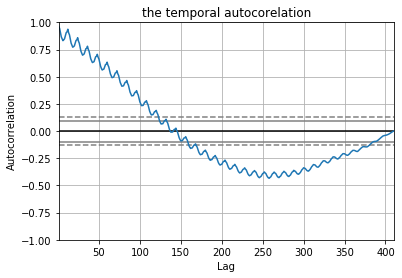

In [4]:
# importing various package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = pd.plotting.autocorrelation_plot(data.set_index('Date_time'))
x.plot()  
# displaying the title
plt.title("the temporal autocorelation")
plt.show()

4. [10 points] Separate the trend, seasonal and residual noise components. Display each component separately. Display the residual noise as a scatter plot and QQ plot. From your interpretation of the residual plots, are there are cyclic, trend or seasonal effects which are unaccounted for?

Points breakdown: 3 points for separating the trend, 2 points for displaying each component. 3 points for the scatter and QQ plot of the residuals and 2 points for your intepreration.

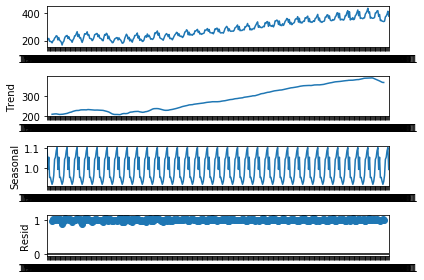

Text(0.5, 1.0, 'QQ plot residuals')

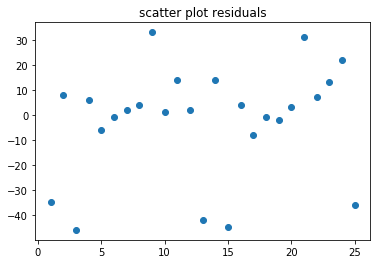

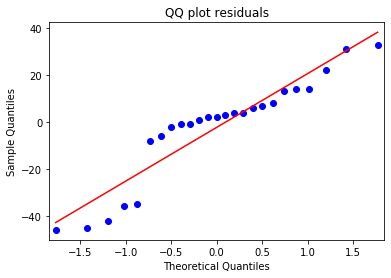

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

from matplotlib import pyplot
series = pd.read_csv("/Users/kafiaelmi/Downloads/2082363_time.csv", header =0, index_col=0)

result = seasonal_decompose(series, model='multiplicative',period=12)
result.plot()
pyplot.show()

import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# create lagged datase
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
days_to_forecast = 25
X = dataframe.values
train, test = X[1:len(X)-days_to_forecast], X[len(X)-days_to_forecast:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]


predictions = list()
for x in test_X:
    yhat = x # keeps the last observation. 
    predictions.append(yhat)

residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)

from statsmodels.graphics.gofplots import qqplot

plt.scatter(range(1,len(residuals)+1), residuals)
plt.title("scatter plot residuals")
x = np.array([i[0]for i in residuals.values])
qqplot(x, line = 'r')
plt.title("QQ plot residuals")

# The plot cyclic is not accounted for because dots are scattered. there is no trend

5. [15 points] Split the time series into a train and test set. Fit an ARIMA model on the training set. Evaluate your model with the test data by computing the RSME and MAD metrics. These metrics are single values. Implement grid search with to find the optimal p,d and q values for ARIMA. Chose at least 3 different values for p and 2 different values for d and q.

Points breakdown: 2 points for splitting the time series into training and test. 4 points for fitting an ARIMA model. 2 points for evaluating your model with the RSME metric. 2 points for evaluating your model with the MAD metric. 5 points for finding the optimal p,d and q values.

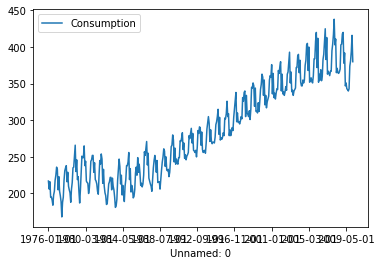

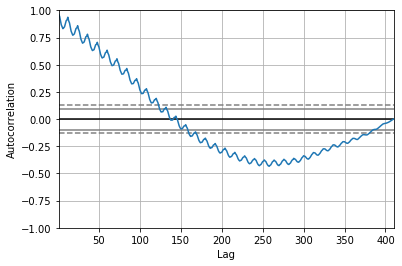

                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                  410
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1646.464
Date:                Mon, 30 May 2022   AIC                           3304.927
Time:                        23:46:10   BIC                           3329.010
Sample:                    01-01-1976   HQIC                          3314.456
                         - 02-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3354      0.046     -7.225      0.000      -0.426      -0.244
ar.L2          0.4103      0.055      7.466      0.000       0.303       0.518
ar.L3          0.1805      0.057      3.186      0.0

In [ ]:
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("/Users/kafiaelmi/Downloads/2082363_time.csv")
df.head
# remove the wrong data (last row)
df=df.dropna()
df.set_index('Unnamed: 0',inplace=True)
df.plot()
plt.show()
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()
pd.plotting.autocorrelation_plot(df)


from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

from sklearn.metrics import mean_squared_error

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

predictions = model_fit.predict(start = len(train), end = len(train)+len(test)-1, dynamic = False)

residuals = [test[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)

print("MAD :  %.3f" % residuals.mad()) 
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

import warnings
warnings.filterwarnings("ignore")

def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
from datetime import datetime

# load dataset
def parser(x):
	return datetime.strptime(data.Date_time.min(), "%Y-%m-%d")
series = pd.read_csv("/Users/kafiaelmi/Downloads/2082363_time.csv", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


# evaluate parameters
p_values = [0, 1, 2, 4]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

# Part 2
## Spatial analysis of elevation in the Netherlands

1. [5 points] Load the dataset "Gementen data.csv" and drop all the rows with missing data. Load the shapefile of the townships of the Netherlands ("bu wk gm2020 shapes/Gemeenten2020.shp") and display the first five rows. Remove all the polygons representing water.

In [ ]:
gemeentedata=pd.read_csv("/Users/kafiaelmi/Downloads/Gemeenten_dataset.csv")
gemeentedata=gemeentedata.dropna()

import geopandas as gpd
# loads the shapefile
gdf = gpd.read_file("/Users/kafiaelmi/Downloads/bu_wk_gm2020_shapes/Gemeenten2020.shp")

# diplays the first five rows of the file 
display(gdf.head())

gdf.drop(gdf.index[gdf['WATER'] =="JA"], inplace=True)

2. [10 points] Perform the following for a maximum of 10 points.

(a) Create a new column called Elevation in the geodataframe of the townships and copy over the contents in column Elevation in the dataframe loaded from "Gementen data.csv". [2 points].

(b) Create a new geopandas dataframe with the following columns; GM NAAM, geometry and Elevation from the output of A [2 points].

(c) Drop all the rows with missing values from the output of B [1 points].

(d) From the output of C, create a Choropleth Map of the townships, with colors assigned by Elevation (`columns=Elevation`). Use a quantiles scheme with 5 quantiles [5 points].

In [ ]:
#a
gdf['Elevation'] = gemeentedata['ELEVATION']
display(gdf.head())
#b
new_dataset = gdf[['Elevation','GM_NAAM', 'geometry']]
display(new_dataset.head())
#c
new_dataset=new_dataset.dropna()
#d
import plotly.express as px
import mapclassify
!pip install mapclassify
new_datasetgemeen = new_dataset[['GM_NAAM','geometry','Elevation']].dropna()
fig, ax = plt.subplots(figsize=(10, 10))
new_datasetgemeen.plot(column='Elevation', scheme='QUANTILES', k=5, cmap='jet',legend=True,ax=ax, legend_kwds={'loc': 'upper left'})

